In [3]:
print("Activating ipynb")
print ("Importing libs")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

Activating ipynb
Importing libs


In [2]:
# Global
years = [x for x in range (2012, 2022)]

In [3]:
# Load Stats
stats_folder_path = "C:/Users/Craig/Documents/Thesis/Thomas_Gallagher_Thesis/Data/AFL_Stats_sorted/Year/Players/"
stats_2012 = pd.read_csv(stats_folder_path + '2012.csv', index_col=False)
stats_2013 = pd.read_csv(stats_folder_path + '2013.csv', index_col=False)
stats_2014 = pd.read_csv(stats_folder_path + '2014.csv', index_col=False)
stats_2015 = pd.read_csv(stats_folder_path + '2015.csv', index_col=False)
stats_2016 = pd.read_csv(stats_folder_path + '2016.csv', index_col=False)
stats_2017 = pd.read_csv(stats_folder_path + '2017.csv', index_col=False)
stats_2018 = pd.read_csv(stats_folder_path + '2018.csv', index_col=False)
stats_2019 = pd.read_csv(stats_folder_path + '2019.csv', index_col=False)
stats_2020 = pd.read_csv(stats_folder_path + '2020.csv', index_col=False)
stats_2021 = pd.read_csv(stats_folder_path + '2021.csv', index_col=False)

all_stats = "C:/Users/Craig/Documents/Thesis/Thomas_Gallagher_Thesis/Data/AFL_Stats_sorted/Year/Players/stats_sorted.csv"
all_stats_raw = pd.read_csv(all_stats, index_col=False)

C:\Users\Craig\AppData\Local\Temp\ipykernel_9584\431392878.py:15: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  all_stats_raw = pd.read_csv(all_stats, index_col=False)


In [4]:
# Load Initial Data
print("Loading Initial Game Data")
games_folder_path = "C:/Users/Craig/Documents/Thesis/Thomas_Gallagher_Thesis/Data/AFL_Stats_sorted/Year/Games/"
games_2012 = pd.read_csv(games_folder_path + '2012.csv', index_col=False, parse_dates=['date'])
games_2013 = pd.read_csv(games_folder_path + '2013.csv', index_col=False, parse_dates=['date'])
games_2014 = pd.read_csv(games_folder_path + '2014.csv', index_col=False, parse_dates=['date'])
games_2015 = pd.read_csv(games_folder_path + '2015.csv', index_col=False, parse_dates=['date'])
games_2016 = pd.read_csv(games_folder_path + '2016.csv', index_col=False, parse_dates=['date'])
games_2017 = pd.read_csv(games_folder_path + '2017.csv', index_col=False, parse_dates=['date'])
games_2018 = pd.read_csv(games_folder_path + '2018.csv', index_col=False, parse_dates=['date'])
games_2019 = pd.read_csv(games_folder_path + '2019.csv', index_col=False, parse_dates=['date'])
games_2020 = pd.read_csv(games_folder_path + '2020.csv', index_col=False, parse_dates=['date'])
games_2021 = pd.read_csv(games_folder_path + '2021.csv', index_col=False, parse_dates=['date'])

all_games_path = os.path.join(games_folder_path + "games_sorted.csv")
all_g = pd.concat([games_2012, games_2013, games_2014, games_2015, games_2016, games_2017, games_2018, games_2019, games_2020, games_2021])
all_g.to_csv(all_games_path, index=False)
all_games = pd.read_csv(all_games_path, index_col=False, parse_dates=['date'])

Loading Initial Game Data


In [5]:
games_list_year = [games_2012, games_2013, games_2014, games_2015, games_2016, games_2017, games_2018, games_2019, games_2020, games_2021]
stats_list_year = [stats_2012, stats_2013, stats_2014, stats_2015, stats_2016, stats_2017, stats_2018, stats_2019, stats_2020, stats_2021]

## Build Y value 
Result of game based on Home Team (Win = 2, Draw = 1, Lose = 0)

In [6]:
y_true_2012 = games_2012['homeWin']
y_true_2013 = games_2013['homeWin']
y_true_2014 = games_2014['homeWin']
y_true_2015 = games_2015['homeWin']
y_true_2016 = games_2016['homeWin']
y_true_2017 = games_2017['homeWin']
y_true_2018 = games_2018['homeWin']
y_true_2019 = games_2019['homeWin']
y_true_2020 = games_2020['homeWin']
y_true_2021 = games_2021['homeWin']
y_true_all = all_games['homeWin']

In [7]:
baseline = {}

def get_baseline(y, year):
    # print(y.count())
    baseline[year] = (y.sum() / (y.count()*2)) * 100

get_baseline(y_true_2012, '2012')
get_baseline(y_true_2013, '2013')
get_baseline(y_true_2014, '2014')
get_baseline(y_true_2015, '2015')
get_baseline(y_true_2016, '2016')
get_baseline(y_true_2017, '2017')
get_baseline(y_true_2018, '2018')
get_baseline(y_true_2019, '2019')
get_baseline(y_true_2020, '2020')
get_baseline(y_true_2021, '2021')

print(baseline)

{'2012': 55.79710144927537, '2013': 55.79710144927537, '2014': 56.763285024154584, '2015': 52.9126213592233, '2016': 59.42028985507246, '2017': 59.17874396135265, '2018': 54.830917874396135, '2019': 57.00483091787439, '2020': 56.79012345679012, '2021': 52.41545893719807}


## Add Previous Game Result
Set default dict to store results for each team
Only a boolean value, draws only account for ~1% of all games 
Default to false
If the last game was a win set to true
# TODO 
add draws in and see if there is a difference

## Computed Variables
These variables did not appear in the original data set but were added later

Travel Data: Used to determine the impact of travel on teams
             Determined by comparing the venue of the upcoming match to the teams home location

Break: Finds the break between a teams last and next game

Team Changes: The number of players that are different in the from the previous match
              The number of games lost/gained from these changes
              The expected score lost/gained from the incoming players
              Split games out and games in into separate variables

Team Composition: The average/total score of all the selected players
                  Done this way to reduce number of features

TODO   
Previous 5 games result: Totals each teams previous games results

             

## One Hot Encoding
The tree models used for feature engineering cannot take in string inputs
Value encoding can be used to change teams to int values, but then the model will read this as distance i.e. the team with value 1 will be read as being closer to the team with value 2 than the team with value 18. 
One Hot Encoding creates a bool variable for each team which is 1 when the team is playing.

# TODO
See if the model performs better with the simple label encoding. 
One hot encoding creates an issue with decision trees as it creates lots of "empty" splits, there will now be 34 variables which the model will split on 0, which can skew the model.

In [8]:
# One Hot Encoding Teams
encoding = LabelEncoder()
encoding.fit(all_games["homeTeam"].values)

def OHE_Teams(games):
    home_teams = encoding.transform(games["homeTeam"].values)
    away_teams = encoding.transform(games["awayTeam"].values)
    
    ##
    games["homeTeam"] = home_teams
    games["awayTeam"] = away_teams
    ##
    all_teams = np.vstack([home_teams, away_teams]).T
    
    # oneHot = OneHotEncoder()
    # X_teams = oneHot.fit_transform(all_teams).todense()
    # X_teams = pd.DataFrame(all_teams)
    # games = pd.concat([games, pd.DataFrame(X_teams)],axis=1)
    return games

games_2012 = OHE_Teams(games_2012)
games_2013 = OHE_Teams(games_2013)
games_2014 = OHE_Teams(games_2014)
games_2015 = OHE_Teams(games_2015)
games_2016 = OHE_Teams(games_2016)
games_2017 = OHE_Teams(games_2017)
games_2018 = OHE_Teams(games_2018)
games_2019 = OHE_Teams(games_2019)
games_2020 = OHE_Teams(games_2020)
games_2021 = OHE_Teams(games_2021)

## One Hot Encoding Venues
Same issues as above, but simplified slightly as there are only 23 stadiums

In [9]:
# One Hot Encoding Venues
encoding = LabelEncoder()
encoding.fit(all_games["venue"].values)
all_venues = all_games["venue"].values

all_venues = all_venues.reshape(-1,1)

def OHE_Venues(games):
    venues = games['venue'].values
    # all_venues = all_venues.reshape(-1,1)
    
    venues = venues.reshape(-1,1)

    oneHot = OneHotEncoder()

    oneHot.fit(all_venues)
    X_venues = oneHot.transform(venues).toarray()
    X_venues = pd.DataFrame(X_venues, columns=oneHot.categories_[0])
    games = pd.concat([games, X_venues], axis=1)
    return games

games_2012 = OHE_Venues(games_2012)
games_2013 = OHE_Venues(games_2013)
games_2014 = OHE_Venues(games_2014)
games_2015 = OHE_Venues(games_2015)
games_2016 = OHE_Venues(games_2016)
games_2017 = OHE_Venues(games_2017)
games_2018 = OHE_Venues(games_2018)
games_2019 = OHE_Venues(games_2019)
games_2020 = OHE_Venues(games_2020)
games_2021 = OHE_Venues(games_2021)

In [10]:
def show_dtypes(df):
    for index in range(len(df.dtypes)):
        print(f'{df.columns[index]} -> {df.dtypes[index]}' )

In [11]:
# Remove Variables
drop_values = ['gameId', 'venue', 'homeWin', 'year','date','startTime', 'attendance', 'homeTeamScore', 'awayTeamScore', 'round']
X_2012 = games_2012.drop(drop_values,axis=1)
X_2013 = games_2013.drop(drop_values,axis=1)
X_2014 = games_2014.drop(drop_values,axis=1)
X_2015 = games_2015.drop(drop_values,axis=1)
X_2016 = games_2016.drop(drop_values,axis=1)
X_2017 = games_2017.drop(drop_values,axis=1)
X_2018 = games_2018.drop(drop_values,axis=1)
X_2019 = games_2019.drop(drop_values,axis=1)
X_2020 = games_2020.drop(drop_values,axis=1)
X_2021 = games_2021.drop(drop_values,axis=1)

In [12]:
X_2012.columns = X_2012.columns.astype(str) 
X_2013.columns = X_2013.columns.astype(str) 
X_2014.columns = X_2014.columns.astype(str) 
X_2015.columns = X_2015.columns.astype(str) 
X_2016.columns = X_2016.columns.astype(str) 
X_2017.columns = X_2017.columns.astype(str) 
X_2018.columns = X_2018.columns.astype(str) 
X_2019.columns = X_2019.columns.astype(str) 
X_2020.columns = X_2020.columns.astype(str) 
X_2021.columns = X_2021.columns.astype(str) 

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
X_2012 = scaler.fit_transform(X_2012)
X_2013 = scaler.fit_transform(X_2013)
X_2014 = scaler.fit_transform(X_2014)
X_2015 = scaler.fit_transform(X_2015)
X_2016 = scaler.fit_transform(X_2016)
X_2017 = scaler.fit_transform(X_2017)
X_2018 = scaler.fit_transform(X_2018)
X_2019 = scaler.fit_transform(X_2019)
X_2020 = scaler.fit_transform(X_2020)
X_2021 = scaler.fit_transform(X_2021)

all_games = scaler.fit_transform(all_games)

## Decision Tree Classifier

For each season I will create a different classifier, so that each season can be assessed individually
These models will not include the 2021 season, even though the final model will be separate to the models created here the feature engineering means that information will possibly be extracted from the data. As such I will leave the final season out of feature engineering 

In [13]:
print(X_2012.isnull().sum().sum(),
X_2013.isnull().sum().sum(),
X_2014.isnull().sum().sum(),
X_2015.isnull().sum().sum(),
X_2016.isnull().sum().sum(),
X_2017.isnull().sum().sum(),
X_2018.isnull().sum().sum(),
X_2019.isnull().sum().sum(),
X_2020.isnull().sum().sum(),
X_2021.isnull().sum().sum() )

0 0 0 0 0 0 0 0 0 0


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

scores = {}
def build_dec_tree_scores(X, y, year):
    clf = DecisionTreeClassifier(random_state=26)
    scores_raw = clf.fit(X, y)
    scores_raw = cross_val_score(clf, X, y)
    scores[year] = np.mean(scores_raw)

build_dec_tree_scores(X_2012, y_true_2012, '2012')
build_dec_tree_scores(X_2013, y_true_2013, '2013')
build_dec_tree_scores(X_2012, y_true_2012, '2014')
build_dec_tree_scores(X_2013, y_true_2013, '2015')
build_dec_tree_scores(X_2012, y_true_2012, '2016')
build_dec_tree_scores(X_2013, y_true_2013, '2017')
build_dec_tree_scores(X_2012, y_true_2012, '2018')
build_dec_tree_scores(X_2013, y_true_2013, '2019')
build_dec_tree_scores(X_2012, y_true_2012, '2020')
build_dec_tree_scores(X_2013, y_true_2013, '2021')

print(scores)
# print("F1: {0:0.4f}".format(np.mean(scores)))

c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than

{'2012': 0.588966318234611, '2013': 0.5466898954703833, '2014': 0.588966318234611, '2015': 0.5466898954703833, '2016': 0.588966318234611, '2017': 0.5466898954703833, '2018': 0.588966318234611, '2019': 0.5466898954703833, '2020': 0.588966318234611, '2021': 0.5466898954703833}


In [15]:
# Exploratory classifier on the original training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
m = RandomForestClassifier(n_estimators=10, n_jobs=-1)
m.fit(X_2012, y_true_2012)
m.score(X_2012, y_true_2012)

# m.score(X_train_orig, y_train_orig)

0.9806763285024155

In [16]:
x_train_2012 = X_2012[:171]
y_train_2012 = y_true_2012[:171]
x_valid_2012 = X_2012[171:]
y_valid_2012 = y_true_2012[171:]

x_train_2013 = X_2013[:171]
y_train_2013 = y_true_2013[:171]
x_valid_2013 = X_2013[171:]
y_valid_2013 = y_true_2013[171:]

x_train_2014 = X_2014[:171]
y_train_2014 = y_true_2014[:171]
x_valid_2014 = X_2014[171:]
y_valid_2014 = y_true_2014[171:]

x_train_2015 = X_2015[:170]
y_train_2015 = y_true_2015[:170]
x_valid_2015 = X_2015[170:]
y_valid_2015 = y_true_2015[170:]

x_train_2016 = X_2016[:171]
y_train_2016 = y_true_2016[:171]
x_valid_2016 = X_2016[171:]
y_valid_2016 = y_true_2016[171:]

x_train_2017 = X_2017[:171]
y_train_2017 = y_true_2017[:171]
x_valid_2017 = X_2017[171:]
y_valid_2017 = y_true_2017[171:]

x_train_2018 = X_2018[:171]
y_train_2018 = y_true_2018[:171]
x_valid_2018 = X_2018[171:]
y_valid_2018 = y_true_2018[171:]

x_train_2019 = X_2019[:171]
y_train_2019 = y_true_2019[:171]
x_valid_2019 = X_2019[171:]
y_valid_2019 = y_true_2019[171:]

x_train_2020 = X_2020[:127]
y_train_2020 = y_true_2020[:127]
x_valid_2020 = X_2020[127:]
y_valid_2020 = y_true_2020[127:]

x_train_2021 = X_2021[:171]
y_train_2021 = y_true_2021[:171]
x_valid_2021 = X_2021[171:]
y_valid_2021 = y_true_2021[171:]

In [17]:
def print_score(m, train, y_train, valid, y_valid, test=None):
    # if test == None:
        print([m.score(train, y_train), m.score(valid, y_valid)])
        pred = m.predict(valid)
        c_train = confusion_matrix(y_valid, pred)
        disp = ConfusionMatrixDisplay(c_train)
        return disp
        # plt.show()
        # ConfusionMatrixDisplay(m, valid, y_valid_2012)
        
    # else:
    #     print(m.score(X_test, y_test))
    #     plot_confusion_matrix(m, X_test, y_test)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

scores = {}
def build_dec_tree_scores(X, y, x_valid, y_valid, year):
    clf = DecisionTreeClassifier(random_state=26)
    scores_raw = clf.fit(X, y)
    pred = clf.predict(x_valid)
    scores_pred = cross_val_score(clf, x_valid, y_valid)
    scores[year] = np.mean(scores_pred)
    return print_score(clf, X, y, x_valid, y_valid)

n_2012 = build_dec_tree_scores(x_train_2012, y_train_2012, x_valid_2012, y_valid_2012, '2012')
n_2013 = build_dec_tree_scores(x_train_2013, y_train_2013, x_valid_2013, y_valid_2013, '2013')
n_2014 = build_dec_tree_scores(x_train_2014, y_train_2014, x_valid_2014, y_valid_2014, '2014')
n_2015 = build_dec_tree_scores(x_train_2015, y_train_2015, x_valid_2015, y_valid_2015, '2015')
n_2016 = build_dec_tree_scores(x_train_2016, y_train_2016, x_valid_2016, y_valid_2016, '2016')
n_2017 = build_dec_tree_scores(x_train_2017, y_train_2017, x_valid_2017, y_valid_2017, '2017')
n_2018 = build_dec_tree_scores(x_train_2018, y_train_2018, x_valid_2018, y_valid_2018, '2018')
n_2019 = build_dec_tree_scores(x_train_2019, y_train_2019, x_valid_2019, y_valid_2019, '2019')
n_2020 = build_dec_tree_scores(x_train_2020, y_train_2020, x_valid_2020, y_valid_2020, '2020')

print(scores)

c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[1.0, 0.5833333333333334]
[1.0, 0.6111111111111112]
[1.0, 0.5]
[1.0, 0.5833333333333334]
[1.0, 0.5555555555555556]
[1.0, 0.5555555555555556]
[1.0, 0.6111111111111112]
[1.0, 0.5555555555555556]
[1.0, 0.6]
{'2012': 0.5607142857142857, '2013': 0.7142857142857142, '2014': 0.6428571428571429, '2015': 0.5499999999999999, '2016': 0.49642857142857133, '2017': 0.6928571428571428, '2018': 0.5285714285714285, '2019': 0.6607142857142858, '2020': 0.5714285714285714}


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2021b659e50>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2021b6ced60>)

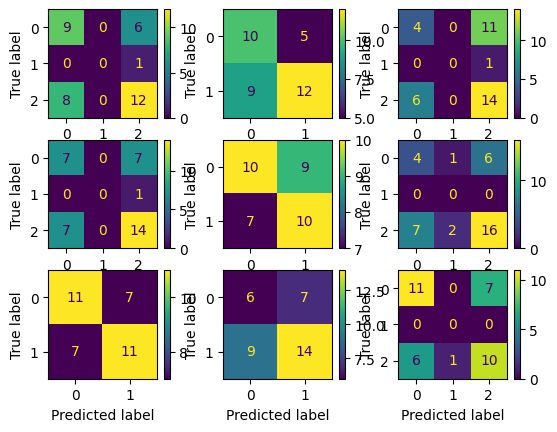

In [19]:
fig, ax = plt.subplots(3,3)

n_2012.plot(ax=ax[0][0]), n_2013.plot(ax=ax[0][1]), n_2014.plot(ax=ax[0][2])
n_2015.plot(ax=ax[1][0]), n_2016.plot(ax=ax[1][1]), n_2017.plot(ax=ax[1][2])
n_2018.plot(ax=ax[2][0]), n_2019.plot(ax=ax[2][1]), n_2020.plot(ax=ax[2][2])

In [20]:
model_1_2012 = RandomForestClassifier(n_estimators=100, n_jobs=-1)
model_1_2012.fit(x_train_2012, y_train_2012)
m_2012 = print_score(model_1_2012, x_train_2012, y_train_2012, x_valid_2012, y_valid_2012)

model_1_2013 = RandomForestClassifier(n_estimators=100, n_jobs=-1)
model_1_2013.fit(x_train_2013, y_train_2013)
m_2013 = print_score(model_1_2013, x_train_2013, y_train_2013, x_valid_2013, y_valid_2013)

model_1_2014 = RandomForestClassifier(n_estimators=100, n_jobs=-1)
model_1_2014.fit(x_train_2014, y_train_2014)
m_2014 = print_score(model_1_2014, x_train_2014, y_train_2014, x_valid_2014, y_valid_2014)

model_1_2015 = RandomForestClassifier(n_estimators=100, n_jobs=-1)
model_1_2015.fit(x_train_2015, y_train_2015)
m_2015 = print_score(model_1_2015, x_train_2015, y_train_2015, x_valid_2015, y_valid_2015)

model_1_2016 = RandomForestClassifier(n_estimators=100, n_jobs=-1)
model_1_2016.fit(x_train_2016, y_train_2016)
m_2016 = print_score(model_1_2016, x_train_2016, y_train_2016, x_valid_2016, y_valid_2016)

model_1_2017 = RandomForestClassifier(n_estimators=100, n_jobs=-1)
model_1_2017.fit(x_train_2017, y_train_2017)
m_2017 = print_score(model_1_2017, x_train_2017, y_train_2017, x_valid_2017, y_valid_2017)

model_1_2018 = RandomForestClassifier(n_estimators=100, n_jobs=-1)
model_1_2018.fit(x_train_2018, y_train_2018)
m_2018 = print_score(model_1_2018, x_train_2018, y_train_2018, x_valid_2018, y_valid_2018)

model_1_2019 = RandomForestClassifier(n_estimators=100, n_jobs=-1)
model_1_2019.fit(x_train_2019, y_train_2019)
m_2019 = print_score(model_1_2019, x_train_2019, y_train_2019, x_valid_2019, y_valid_2019)

model_1_2020 = RandomForestClassifier(n_estimators=100, n_jobs=-1)
model_1_2020.fit(x_train_2020, y_train_2020)
m_2020 = print_score(model_1_2020, x_train_2020, y_train_2020, x_valid_2020, y_valid_2020)



[1.0, 0.5555555555555556]
[1.0, 0.6666666666666666]
[1.0, 0.6666666666666666]
[1.0, 0.6111111111111112]
[1.0, 0.4722222222222222]
[1.0, 0.75]
[1.0, 0.75]
[1.0, 0.6666666666666666]
[1.0, 0.6]


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2022528d850>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x20225202730>)

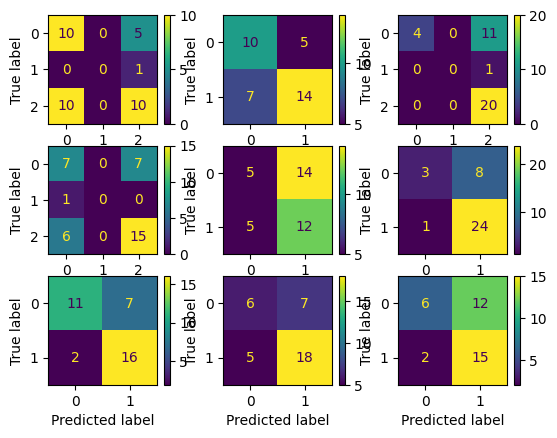

In [21]:
fig, ax = plt.subplots(3,3)

m_2012.plot(ax=ax[0][0]), m_2013.plot(ax=ax[0][1]), m_2014.plot(ax=ax[0][2])
m_2015.plot(ax=ax[1][0]), m_2016.plot(ax=ax[1][1]), m_2017.plot(ax=ax[1][2])
m_2018.plot(ax=ax[2][0]), m_2019.plot(ax=ax[2][1]), m_2020.plot(ax=ax[2][2])

In [22]:
from sklearn.model_selection import RandomizedSearchCV
grid={
    'criterion':        ['entropy','gini'],
    'min_samples_split':[3, 5, 7, 9, 10],
    'min_samples_leaf': [8, 9, 10, 11, 12],
    'max_features':     [0.5, "sqrt", "log2", 0.8],
    'n_estimators':     [10, 20, 40],
}

model_2 = RandomizedSearchCV(estimator=RandomForestClassifier(),
                       param_distributions=grid,
                       n_iter=100,
                       cv=4,
                       verbose=1,
                       n_jobs=-1,
                       random_state=42)

model_2.fit(x_train_2012, y_train_2012)
m2_2012 = print_score(model_1_2012, x_train_2012, y_train_2012, x_valid_2012, y_valid_2012)
model_2.fit(x_train_2013, y_train_2013)
m2_2013 = print_score(model_1_2013, x_train_2013, y_train_2013, x_valid_2013, y_valid_2013)
model_2.fit(x_train_2014, y_train_2014)
m2_2014 = print_score(model_1_2014, x_train_2014, y_train_2014, x_valid_2014, y_valid_2014)
model_2.fit(x_train_2015, y_train_2015)
m2_2015 = print_score(model_1_2015, x_train_2015, y_train_2015, x_valid_2015, y_valid_2015)
model_2.fit(x_train_2016, y_train_2016)
m2_2016 = print_score(model_1_2016, x_train_2016, y_train_2016, x_valid_2016, y_valid_2016)
model_2.fit(x_train_2017, y_train_2017)
m2_2017 = print_score(model_1_2017, x_train_2017, y_train_2017, x_valid_2017, y_valid_2017)
model_2.fit(x_train_2018, y_train_2018)
m2_2018 = print_score(model_1_2018, x_train_2018, y_train_2018, x_valid_2018, y_valid_2018)
model_2.fit(x_train_2019, y_train_2019)
m2_2019 = print_score(model_1_2019, x_train_2019, y_train_2019, x_valid_2019, y_valid_2019)
model_2.fit(x_train_2020, y_train_2020)
m2_2020 = print_score(model_1_2020, x_train_2020, y_train_2020, x_valid_2020, y_valid_2020)


Fitting 4 folds for each of 100 candidates, totalling 400 fits
[1.0, 0.5555555555555556]
Fitting 4 folds for each of 100 candidates, totalling 400 fits


c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


[1.0, 0.6666666666666666]
Fitting 4 folds for each of 100 candidates, totalling 400 fits
[1.0, 0.6666666666666666]
Fitting 4 folds for each of 100 candidates, totalling 400 fits


c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


[1.0, 0.6111111111111112]
Fitting 4 folds for each of 100 candidates, totalling 400 fits
[1.0, 0.4722222222222222]
Fitting 4 folds for each of 100 candidates, totalling 400 fits


c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


[1.0, 0.75]
Fitting 4 folds for each of 100 candidates, totalling 400 fits


c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


[1.0, 0.75]
Fitting 4 folds for each of 100 candidates, totalling 400 fits
[1.0, 0.6666666666666666]
Fitting 4 folds for each of 100 candidates, totalling 400 fits


c:\Users\Craig\Documents\Thesis\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


[1.0, 0.6]


In [58]:
model_2.best_estimator_

bag_model_2012 = model_2.best_estimator_
%time bag_model_2012.fit(x_train_2012, y_train_2012)
m2_2012 = print_score(bag_model_2012, x_train_2012, y_train_2012, x_valid_2012, y_valid_2012)

bag_model_2012 = model_2.best_estimator_
%time bag_model_2012.fit(x_train_2012, y_train_2012)
m2_2012 = print_score(bag_model_2012, x_train_2012, y_train_2012, x_valid_2012, y_valid_2012)


CPU times: total: 46.9 ms
Wall time: 38 ms
[0.8128654970760234, 0.6666666666666666]


In [168]:
# from sklearn import metrics
# import matplotlib.pyplot as plt
# preds = np.stack([tree.predict(x_valid_2012.values) for tree in bag_model_2012.estimators_])
# np.mean(preds)
# fpr, tpr, thresholds = metrics.roc_curve(y_valid_2012, np.mean(preds[:i+1], pos_label = 1))

# plt.plot([metrics.roc_auc_score(y_valid_2012, np.mean(preds[:i+1], axis=0)) for i in range(20)])

ValueError: X has 45 features, but DecisionTreeClassifier is expecting 15 features as input.

In [23]:
a_2012_ohe = np.hstack([x_train_2012])
a_valid = np.hstack([x_valid_2012])

a_2012_ohe

array([[ 8. , 15. ,  0. , ...,  0. ,  0. ,  0. ],
       [13. ,  2. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 9. ,  3. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 9. , 12. ,  0.2, ...,  0. ,  0. ,  1. ],
       [13. , 17. ,  0.6, ...,  0. ,  0. ,  0. ],
       [ 4. , 11. ,  0.6, ...,  0. ,  0. ,  0. ]])

In [24]:
model_2.best_estimator_
s_model = model_2.best_estimator_
%time s_model.fit(x_train_2012, y_train_2012)

m2_2012 = print_score(s_model, x_train_2012, y_train_2012, x_valid_2012, y_valid_2012)

CPU times: total: 46.9 ms
Wall time: 40 ms
[0.8771929824561403, 0.6111111111111112]


In [25]:

import seaborn as sns
y_proba_2012 = model_2.predict_proba(x_valid_2012)
y_proba_2013 = model_2.predict_proba(x_valid_2013)
y_proba_2014 = model_2.predict_proba(x_valid_2014)
y_proba_2015 = model_2.predict_proba(x_valid_2015)
y_proba_2016 = model_2.predict_proba(x_valid_2016)
y_proba_2017 = model_2.predict_proba(x_valid_2017)
y_proba_2018 = model_2.predict_proba(x_valid_2018)
y_proba_2019 = model_2.predict_proba(x_valid_2019)
y_proba_2020 = model_2.predict_proba(x_valid_2020)

In [26]:
from treeinterpreter import treeinterpreter as ti

In [27]:
# fastai
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [28]:
s_model.feature_importances_

array([0.        , 0.00715262, 0.01520008, 0.        , 0.        ,
       0.        , 0.        , 0.00697443, 0.00407792, 0.02880878,
       0.013107  , 0.01688634, 0.        , 0.00149571, 0.03970253,
       0.05441991, 0.04199201, 0.26103506, 0.11668572, 0.00718246,
       0.07237401, 0.00928925, 0.00157429, 0.04873437, 0.02758403,
       0.01604744, 0.09492307, 0.05325167, 0.06150129, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

<Axes: xlabel='cols'>

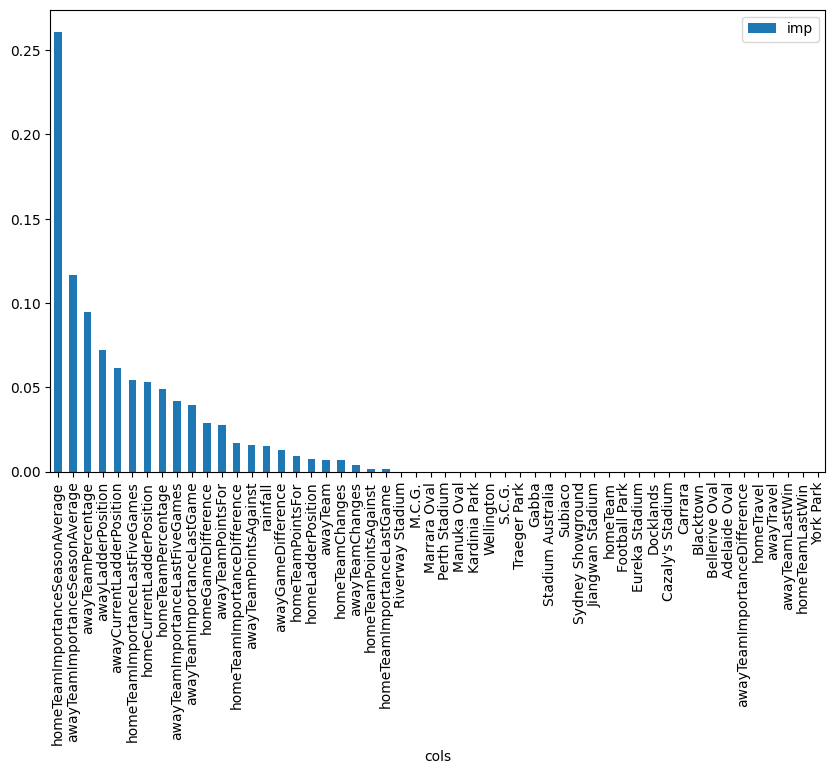

In [29]:
fi = rf_feat_importance(s_model , x_valid_2012)
fi.plot('cols', 'imp', 'bar', figsize=(10,6))

In [30]:
fi[:15]

,cols,imp
17,homeTeamImportanceSeasonAverage,0.261035
18,awayTeamImportanceSeasonAverage,0.116686
26,awayTeamPercentage,0.094923
20,awayLadderPosition,0.072374
28,awayCurrentLadderPosition,0.061501
15,homeTeamImportanceLastFiveGames,0.054420
27,homeCurrentLadderPosition,0.053252
23,homeTeamPercentage,0.048734
16,awayTeamImportanceLastFiveGames,0.041992
14,awayTeamImportanceLastGame,0.039703


In [31]:
f = fi[:15].cols
cut_train_2012 = x_train_2012[f]
cut_valid_2012 = x_valid_2012[f]

In [38]:
model_3 = model_2.best_estimator_
%time model_3.fit(cut_train_2012, y_train_2012)
print_score(model_3, cut_train_2012, y_train_2012, cut_valid_2012, y_valid_2012)

CPU times: total: 31.2 ms
Wall time: 29 ms
[0.8304093567251462, 0.6944444444444444]


<Axes: xlabel='cols'>

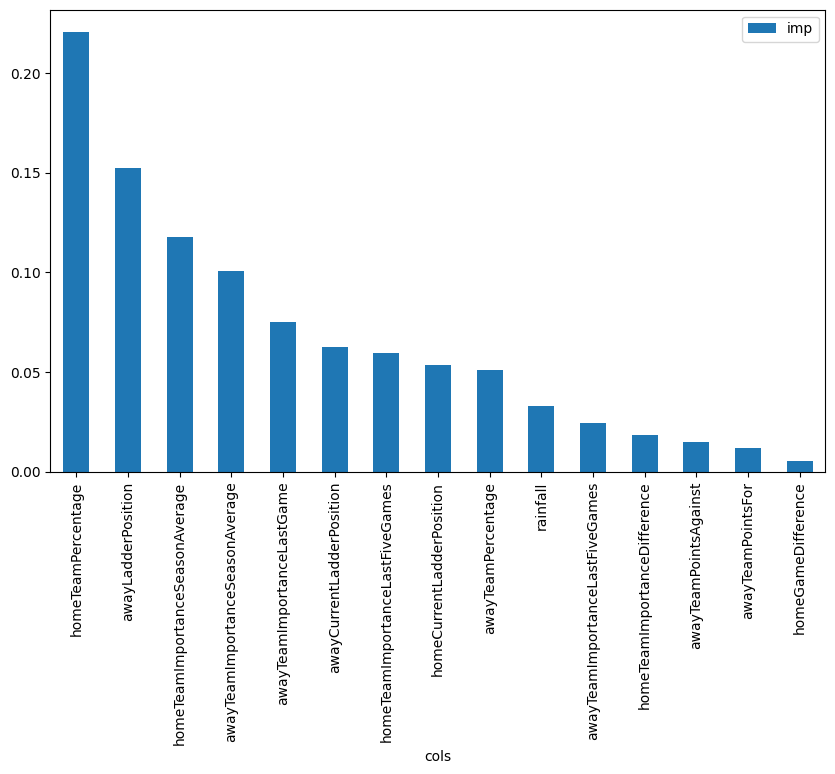

In [39]:
fi2 = rf_feat_importance(model_3 , cut_train_2012)
fi2.plot('cols', 'imp', 'bar', figsize=(10,6))

In [40]:
fi2, fi[:15]

(                               cols       imp
 7                homeTeamPercentage  0.220690
 3                awayLadderPosition  0.152358
 0   homeTeamImportanceSeasonAverage  0.117419
 1   awayTeamImportanceSeasonAverage  0.100725
 9        awayTeamImportanceLastGame  0.074808
 4         awayCurrentLadderPosition  0.062637
 5   homeTeamImportanceLastFiveGames  0.059323
 6         homeCurrentLadderPosition  0.053483
 2                awayTeamPercentage  0.050920
 14                         rainfall  0.032757
 8   awayTeamImportanceLastFiveGames  0.024237
 12     homeTeamImportanceDifference  0.018486
 13            awayTeamPointsAgainst  0.015046
 11                awayTeamPointsFor  0.011970
 10               homeGameDifference  0.005140,
                                cols       imp
 17  homeTeamImportanceSeasonAverage  0.261035
 18  awayTeamImportanceSeasonAverage  0.116686
 26               awayTeamPercentage  0.094923
 20               awayLadderPosition  0.072374
 28        a

In [41]:
row = x_valid_2012.values[None,0]
row

array([[ 6.00000000e+00,  1.40000000e+01,  4.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  5.00000000e+00,  3.00000000e+00,
        -6.54000000e+02, -1.22000000e+02, -3.10578030e+01,
        -1.23063131e+01,  7.05454546e+01,  7.87954546e+01,
         7.67534091e+01,  7.46018939e+01,  7.70385872e+01,
         7.49225895e+01,  2.00000000e+00,  6.00000000e+00,
         1.99000000e+03,  1.73500000e+03,  1.14697406e+02,
         2.07800000e+03,  1.77700000e+03,  1.16938661e+02,
         7.00000000e+00,  1.00000000e+01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [42]:
prediction, bias, contributions = ti.predict(m, row)
prediction[0][0], bias[0][0]

(0.09999999999999999, 0.45362318840579713)

In [43]:
contributions

array([[[-2.45176605e-02, -9.38172370e-04,  2.54558328e-02],
        [-1.87628752e-02,  0.00000000e+00,  1.87628752e-02],
        [-2.83625731e-02,  0.00000000e+00,  2.83625731e-02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-6.66666667e-02,  0.00000000e+00,  6.66666667e-02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 5.55555556e-03,  0.00000000e+00, -5.55555556e-03],
        [-4.73684211e-03,  0.00000000e+00,  4.73684211e-03],
        [-8.18277618e-03,  3.42973674e-04,  7.83980251e-03],
        [-5.94557309e-02,  3.81096653e-04,  5.90746343e-02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-8.27838828e-03,  0.00000000e+00,  8.27838828e-03],
        [-2.71639730e-02,  0.00000000e+00,  2.71639730e-02],
        [-1.84965498e-02,  5.00384345e-04,  1.79961654e-02],
        [ 2.22955357e-02

In [44]:
idxs = np.argsort(contributions[0][:,0])
idxs

array([19, 17,  5, 11, 23, 18,  2, 14,  0, 21,  1, 15, 13, 10, 24, 27,  9,
       43, 36, 37, 38, 39, 49, 48, 41, 46, 45, 44, 42, 35, 40, 33, 51, 31,
        3, 30, 29,  4, 50,  6, 32, 12,  7, 26, 47, 25,  8, 22, 34, 16, 28,
       20], dtype=int64)

In [45]:
pd.DataFrame( [o for o in zip(x_valid_2012.columns[idxs], x_valid_2012.iloc[0][idxs], contributions[0][:,0][idxs])] )

,0,1,2
0,homeLadderPosition,2.000000,-0.075000
1,homeTeamImportanceSeasonAverage,77.038587,-0.072708
2,awayTravel,0.000000,-0.066667
3,homeTeamImportanceDifference,-31.057803,-0.059456
4,homeTeamPercentage,114.697406,-0.057205
5,awayTeamImportanceSeasonAverage,74.922590,-0.029767
6,rainfall,4.000000,-0.028363
7,awayTeamImportanceLastGame,78.795455,-0.027164
8,homeTeam,6.000000,-0.024518
9,homeTeamPointsFor,1990.000000,-0.022579


In [46]:
from sklearn.model_selection import GridSearchCV
parameter_space = {
    "max_features": [2,10,50,'auto'],
    "n_estimators": [50,100,200],
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": [1,2,4,6]
}

rf = RandomForestClassifier(random_state=26)
grid = GridSearchCV(rf, parameter_space)
grid.fit(x_train_2012, y_train_2012)
# scores_rf_teams = cross_val_score(rf, X_teams_2012, y_true_2012)
print("F1: {0:0.4f}".format(np.mean(grid.best_score_)))

F1: 0.7602
